# Oscylator harmoniczny
całkowanie [metodą Eulera](https://en.wikipedia.org/wiki/Semi-implicit_Euler_method)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"]=True
plt.rcParams["figure.dpi"]=150

In [2]:
# parametry układu

omega = 6.28 # częstość własna 2π/T

# warunek początkowy
x0, v0 = 1, 0

dt = 0.0005 # krok czasowy

In [3]:
xi, vi = [], []

# wartości chwilowe położenia i prędkości
x, v = x0, v0

ti = np.arange(start=0, stop=3, step=dt)

In [4]:
for t in ti:
    # wyznaczamy przyspieszenie chwilowe
    a = -omega**2 * x

    # uaktualniamy prędkość
    v += a*dt

    # uaktualniamy położenie
    x += v*dt

    xi.append(x)
    vi.append(v)

Text(0, 0.5, 'v')

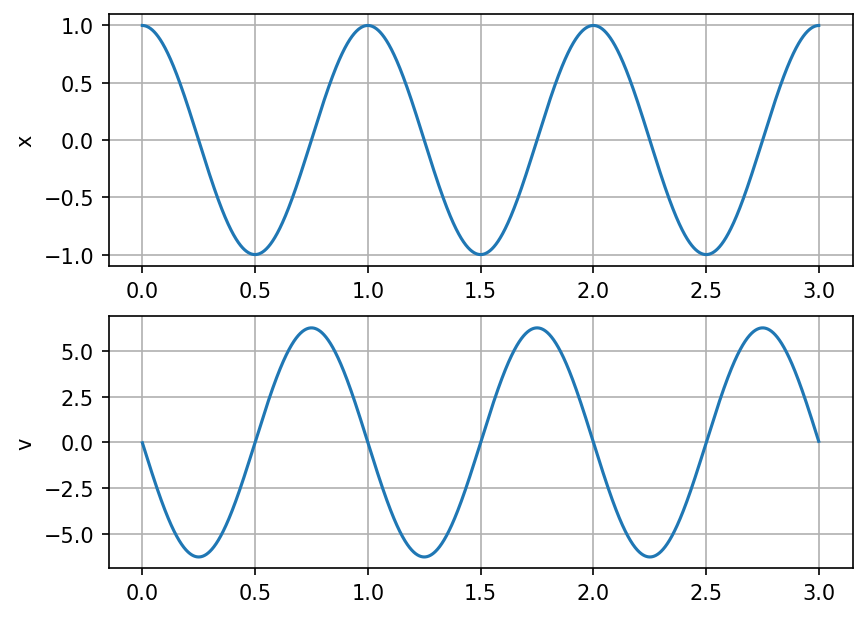

In [5]:
fig, axs = plt.subplots(2,1)
axs[0].plot(ti, xi)
axs[1].plot(ti, vi)
axs[0].set_ylabel("x")
axs[1].set_ylabel("v")

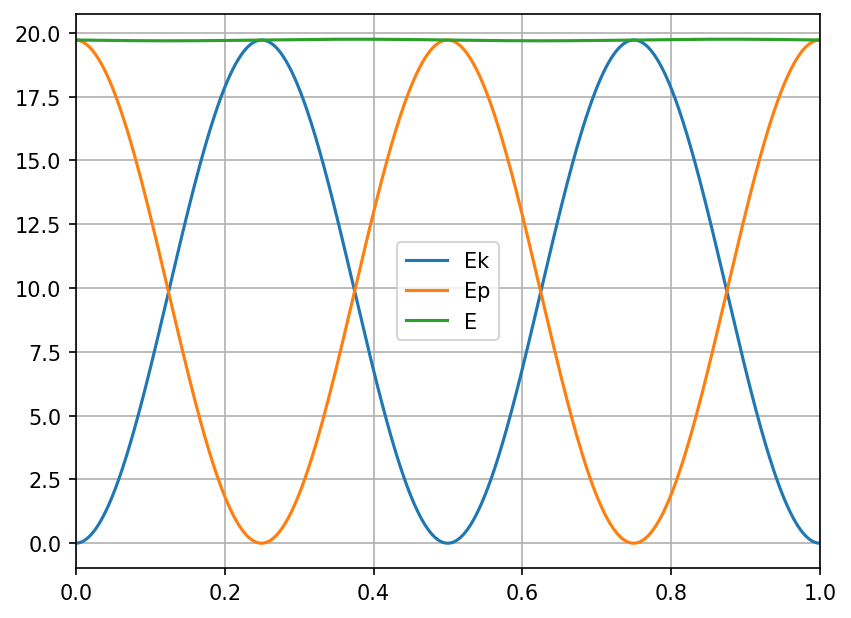

In [6]:
# policzmy energię

x = np.array(xi)
v = np.array(vi)

m=1 # masa
k=m*omega**2

# energia kinetyczna
Ek = 0.5*m*v*v

# energia potencjalna
Ep = 0.5*k*x*x

plt.plot(ti, Ek, label="Ek")
plt.plot(ti, Ep, label="Ep")
plt.plot(ti, Ek+Ep, label="E")
plt.xlim((0,1))
plt.legend(loc=0);

In [8]:
from scipy.integrate import solve_ivp

## 1. Brak tłumienia, brak wymuszenia

In [9]:
# ω0 - częstość własna oscylatora; ω0 = 2π/T
def f1(t, X, omega0,A,omega,b):
    x, v = X
    dx_dt = v
    #dv_dt = -omega0**2 * x
    dv_dt = A*np.sin(omega*t)-np.sin(x)-b*dx_dt
    return [dx_dt, dv_dt]

In [10]:
t = np.arange(start=0, stop=1000, step=0.01) # wartości czasu, dla których szukamy rozwiązania
omega0 = np.pi
omega = 0.2
b = 0.1
A = 0.6
x0, v0 = 1., 0 # warunek początkowy
sol = solve_ivp(f1, args=(omega0,A,omega,b), y0=(x0, v0), t_span=(0, t.max()), t_eval=t)

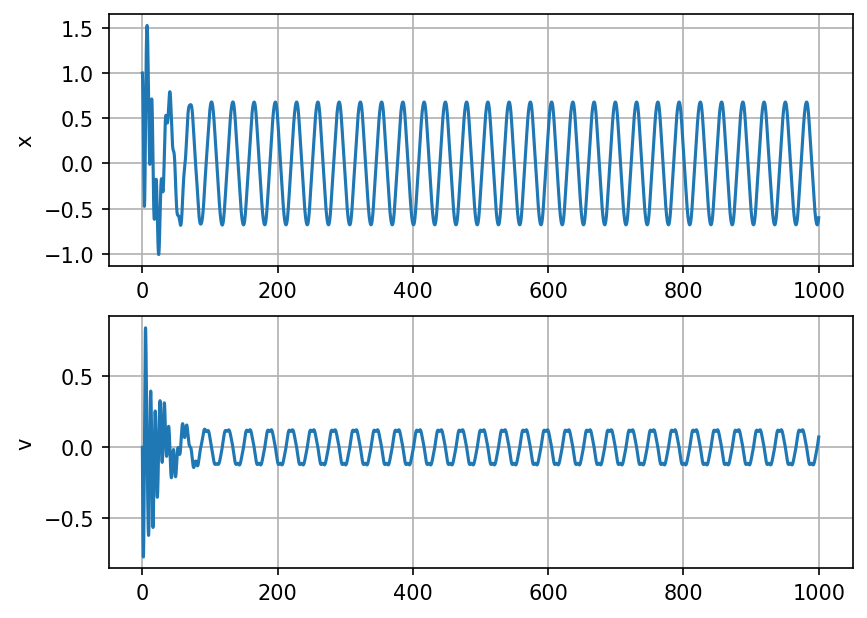

In [11]:
fig, axs = plt.subplots(2,1)
axs[0].plot(sol.t, sol.y[0])
axs[1].plot(sol.t, sol.y[1])
axs[0].set_ylabel("x")
axs[1].set_ylabel("v");

## 2. Tłumienie, brak wymuszenia

In [12]:
alpha = 0.2

In [13]:
# α - współczynnik tłumienia; siła tłumienia F=-2α/m * v
def f2(t, X, omega0, alpha):
    x, v = X
    dx = v
    dv = -omega0**2 * x - 2*alpha * v # a
    return [dx, dv]

In [14]:
t = np.arange(0,10,0.01)
omega0=2*np.pi
alpha=omega0
A=1.
x0, v0 = A, 0
sol = solve_ivp(f2, args=(omega0,alpha), y0=(x0, v0), t_span=(0, t.max()), t_eval=t)

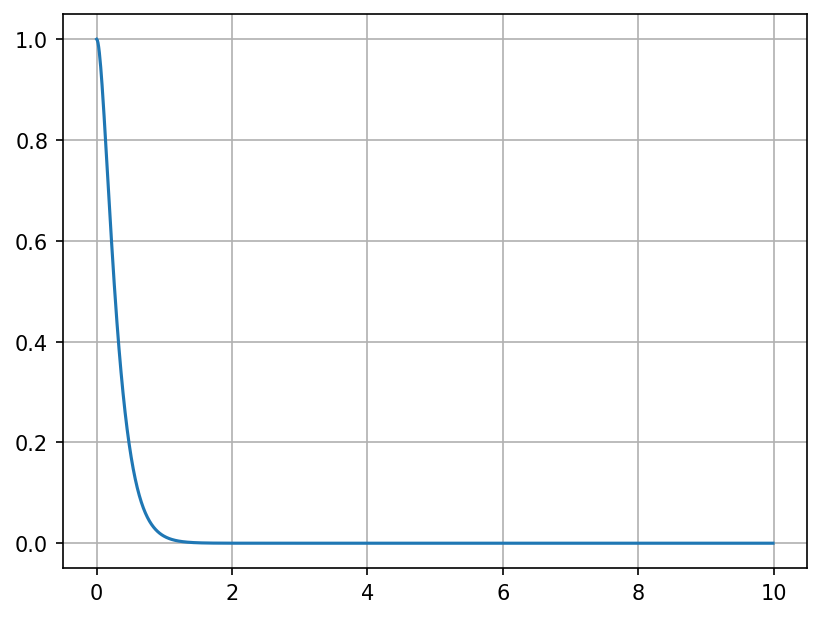

In [15]:
plt.plot(sol.t, sol.y[0])
#plt.plot(sol.t, A*np.exp(-alpha*sol.t)) # amplituda - rozwiązanie analityczne

## 3. Tłumienie, wymuszenie. Zjawisko rezonansu.

In [16]:
# f0, ω - amplituda i częstość wymuszenia
def f3(t, X, omega0, alpha, f0, omega):
    x, v = X
    ft = - 2*alpha * v
    fw = f0 * np.sin(omega * t) # siła wymuszająca
    dx = v
    dv = -omega0**2 * x + ft  + fw
    return [dx, dv]

In [17]:
t=np.arange(0,100,0.01)
omega0=2*np.pi
alpha=0.1
f0=0.1
omega=6.2815
x0, v0 = -0.1, 0.
sol = solve_ivp(f3, args=(omega0,alpha, f0, omega), y0=(x0, v0), 
                t_span=(0, t.max()), t_eval=t)

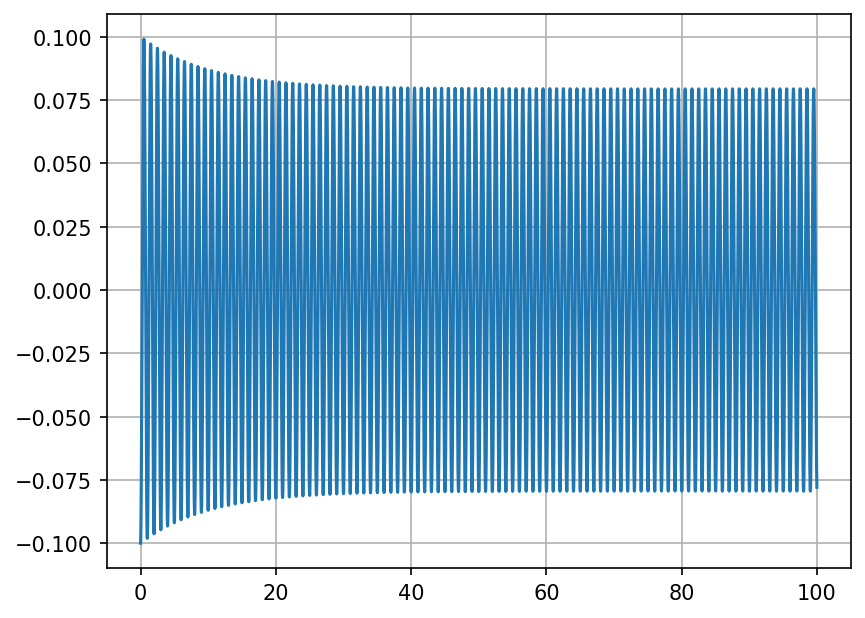

In [18]:
plt.plot(sol.t, sol.y[0])

In [19]:
print(f"Amplituda: {np.max(sol.y[0,-1000:])}")
print(f"częstość rezonansowa: {np.sqrt(omega0**2-2*alpha**2)}")

Amplituda: 0.07943573298408016
częstość rezonansowa: 6.281593556125502


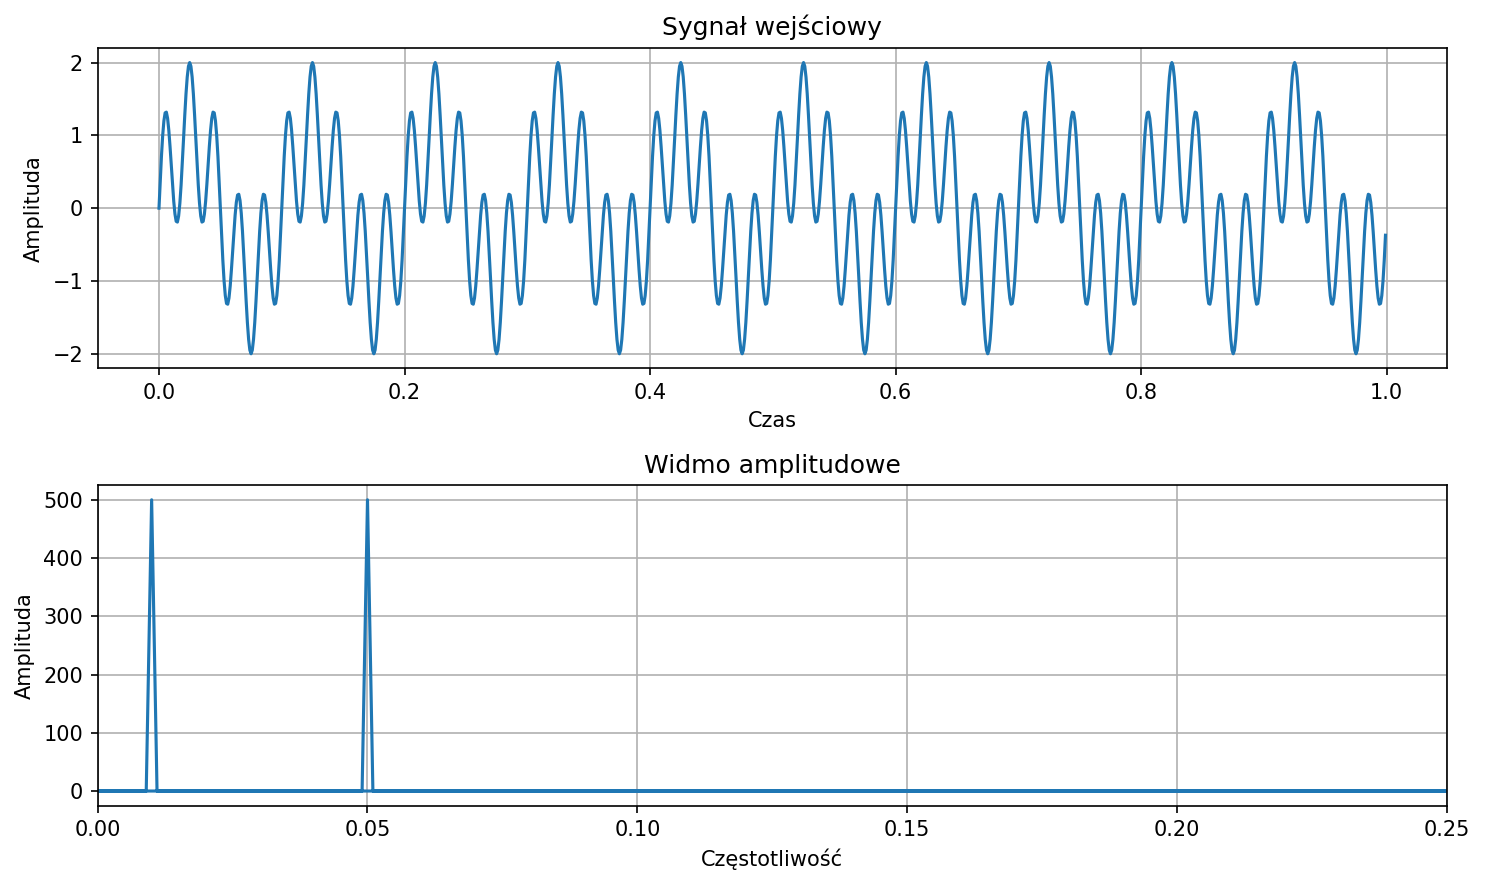

In [20]:
# Przykładowy sygnał jednowymiarowy
# Możesz zastąpić ten sygnał swoim własnym
t = np.linspace(0, 1, 1000, endpoint=False)
f1 = 10  # Częstotliwość sygnału
f2 = 50  # Częstotliwość sygnału
signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

# Obliczanie transformaty Fouriera
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(fft_result))

# Wyświetlenie wyników
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Sygnał wejściowy')
plt.xlabel('Czas')
plt.ylabel('Amplituda')

plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fft_result))
plt.title('Widmo amplitudowe')
plt.xlabel('Częstotliwość')
plt.ylabel('Amplituda')
plt.xlim(0, 0.25)  # Wyświetlanie tylko połowy widma (częstotliwości nieujemne)
plt.tight_layout()

plt.show()